In [17]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.metrics import structural_similarity as ssim
from PIL import Image
import numpy as np
from scipy.spatial.distance import directed_hausdorff
import cv2 as cv
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from sklearn.metrics.pairwise import cosine_similarity

In [18]:
canny_input = 'canny_dataset'
canny_output = 'canny_recon'

canny_dataset = [file for file in os.listdir(canny_input)]
canny_dataset = ["./" + canny_input + "/" + x for x in canny_dataset]

canny_recon = [file for file in os.listdir(canny_output)]
canny_recon = ["./" + canny_output + "/" + x for x in canny_recon]

images_input = 'images_dataset'
images_output = 'images_recon'

images_dataset = [file for file in os.listdir(images_input)]
images_dataset = ["./" + images_input + "/" + x for x in images_dataset]

images_recon = [file for file in os.listdir(images_output)]
images_recon = ["./" + images_output + "/" + x for x in images_recon]

color_input = 'color_dataset'
color_output = 'color_recon'

color_dataset = [file for file in os.listdir(color_input)]
color_dataset = ["./" + color_input + "/" + x for x in color_dataset]

color_recon = [file for file in os.listdir(color_output)]
color_recon = ["./" + color_output + "/" + x for x in color_recon]

In [19]:
vgg16 = VGG16(weights='imagenet', include_top=False, pooling='max', input_shape=(224, 224, 3))

# Freezing the layers
for model_layer in vgg16.layers:
    model_layer.trainable = False

def load_and_preprocess_image(image_path):
    """
    Load and preprocess an image for the VGG16 model.
    """
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded)

def get_image_embeddings(img_array):
    """
    Get image embeddings using the VGG16 model.
    """
    return vgg16.predict(img_array)

def get_similarity_score(first_image_path, second_image_path):
    """
    Compute the similarity score between two images.
    """
    first_image_array = load_and_preprocess_image(first_image_path)
    second_image_array = load_and_preprocess_image(second_image_path)
    first_image_embedding = get_image_embeddings(first_image_array)
    second_image_embedding = get_image_embeddings(second_image_array)
    return cosine_similarity(first_image_embedding, second_image_embedding)[0][0]

In [20]:
def normalized_hausdorff_distance(img1, img2):
    # Find Canny edges for both images
    edges1 = cv.Canny(img1, 100, 200)
    edges2 = cv.Canny(img2, 100, 200)

    # Get the coordinates of edge points in both images
    points1 = np.column_stack(np.where(edges1 > 0))
    points2 = np.column_stack(np.where(edges2 > 0))

    # Compute directed Hausdorff distances
    d_forward = directed_hausdorff(points1, points2)[0]
    d_reverse = directed_hausdorff(points2, points1)[0]

    # Hausdorff distance is the max of the two directed distances
    hausdorff_dist = max(d_forward, d_reverse)

    # Calculate the diagonal of the image (the longest possible distance)
    height, width = img1.shape
    diagonal = np.sqrt(width**2 + height**2)

    # Normalize the Hausdorff distance by the diagonal
    normalized_dist = hausdorff_dist / diagonal
    return normalized_dist

In [21]:
vgg_scores = []

for i in range(len(images_dataset)):
    similarity_score = get_similarity_score(images_dataset[i], images_recon[i])
    vgg_scores.append(similarity_score)

1/1 [==============================] - 0s 94ms/step


In [22]:
hausdorff_scores = []

for i in range(len(images_dataset)):
    print(i)
    img1 = cv.imread(images_dataset[i], 0)  # Load in grayscale
    img2 = cv.imread(images_recon[i], 0)  # Load in grayscale

    distance = normalized_hausdorff_distance(img1, img2)
    hausdorff_scores.append(distance)

complement_hausdorff_scores = [1 - x for x in hausdorff_scores]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148


In [38]:
ssim_scores = []

for i in range(149):
    print(i)

    # Read the images
    img1 = cv.imread(color_dataset[i])
    img2 = cv.imread(color_recon[i])

    # Ensure the images are the same size (optional)
    if img1.shape != img2.shape:
        print(f"Image shapes are different: {img1.shape} vs {img2.shape}")
        continue  # Skip comparison if images are different sizes

    # Set win_size based on your image size (make sure it's smaller or equal to your smallest image dimension)
    win_size = min(img1.shape[0], img1.shape[1], 31)  # Set a reasonable window size

    # Compute SSIM for color images
    score, diff = ssim(img1, img2, win_size=win_size, channel_axis=-1, full=True)

    # Append the SSIM score
    ssim_scores.append(score)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148


In [39]:
print(np.mean(ssim_scores))

0.9041794882409246


In [40]:
def contraharmonic_mean_3(num1, num2, num3):
    return (num1 ** 2 + num2 ** 2 + num3 ** 2) / (num1 + num2 + num3)

In [41]:
final_scores = [contraharmonic_mean_3(vgg_scores[i], complement_hausdorff_scores[i], ssim_scores[i]) for i in range(149)]

In [42]:
print("FINAL SCORE STATS:")
print("Mean: ", np.mean(final_scores))
print("Median: ", np.median(final_scores))
print("Max: ", np.max(final_scores))
print("Min: ", np.min(final_scores))
print("Std:", np.std(final_scores))

FINAL SCORE STATS:
Mean:  0.8859600837249285
Median:  0.9047448102593768
Max:  0.9488118800602184
Min:  0.5838504694012793
Std: 0.059403776908538375


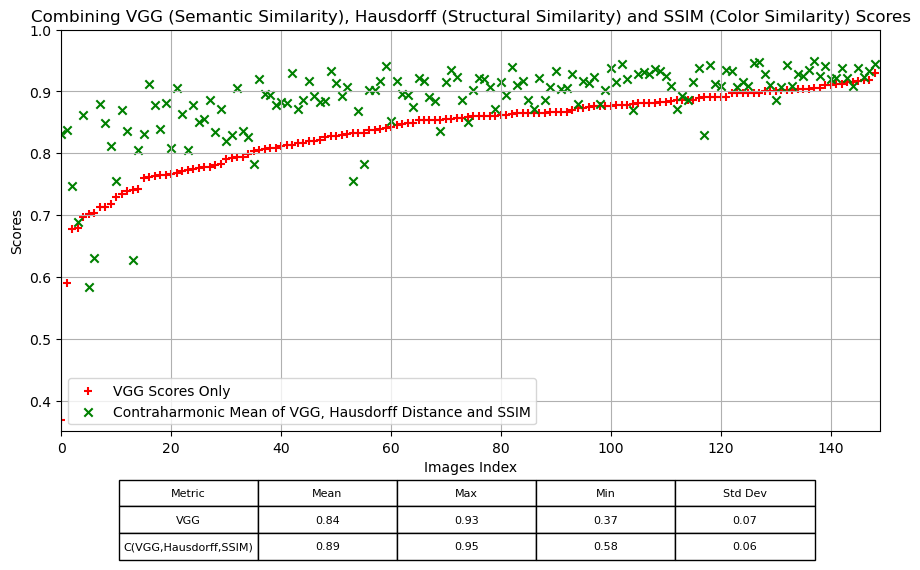

In [43]:
# Sort the lists based on vgg_scores
sorted_indices = np.argsort(vgg_scores)

vgg_scores_sorted = np.array(vgg_scores)[sorted_indices]
final_scores_sorted = np.array(final_scores)[sorted_indices]


# Calculate statistics for each list
def get_stats(lst):
    return {
        'mean': np.mean(lst),
        'max': np.max(lst),
        'min': np.min(lst),
        'std': np.std(lst)
    }

vgg_stats = get_stats(vgg_scores_sorted)
final_stats = get_stats(final_scores_sorted)

# Limit to 2 decimal places for clarity
table_data = [
    ['VGG', f"{vgg_stats['mean']:.2f}", f"{vgg_stats['max']:.2f}", f"{vgg_stats['min']:.2f}", f"{vgg_stats['std']:.2f}"],
    ['C(VGG,Hausdorff,SSIM)', f"{final_stats['mean']:.2f}", f"{final_stats['max']:.2f}", f"{final_stats['min']:.2f}", f"{final_stats['std']:.2f}"],
]

# Scatter plot
plt.figure(figsize=(9, 6))

plt.scatter(range(len(vgg_scores_sorted)), vgg_scores_sorted, label='VGG Scores Only', color='red', marker='+')
plt.scatter(range(len(final_scores_sorted)), final_scores_sorted, label='Contraharmonic Mean of VGG, Hausdorff Distance and SSIM', color='g', marker='x')

# Add labels and title
plt.xlabel('Images Index')
plt.ylabel('Scores')
plt.title('Combining VGG (Semantic Similarity), Hausdorff (Structural Similarity) and SSIM (Color Similarity) Scores')
plt.legend()

# Create the table with the chosen parameters
table = plt.table(cellText=table_data, 
                  colLabels=['Metric', 'Mean', 'Max', 'Min', 'Std Dev'],
                  cellLoc='center', loc='upper center', bbox=[0.07, -0.32, 0.85, 0.2])

# Adjust font size and scaling
table.auto_set_font_size(False)
table.set_fontsize(8)
table.scale(0.7, 0.7)
plt.ylim(0.35, 1)
plt.xlim(0, 149)

plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

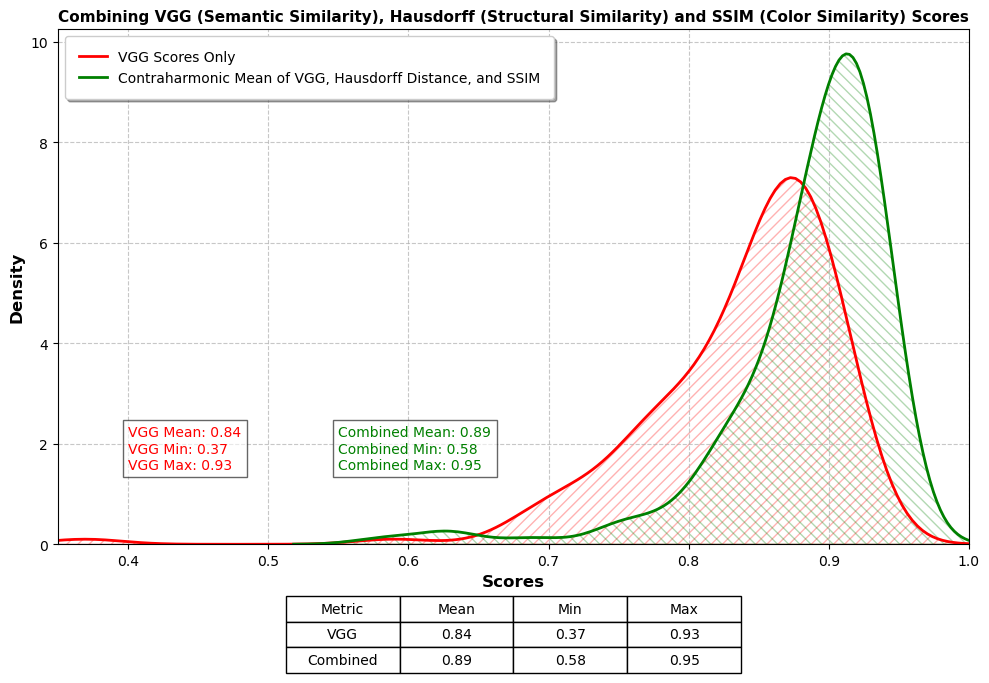

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the lists based on vgg_scores (if needed)
sorted_indices = np.argsort(vgg_scores)

vgg_scores_sorted = np.array(vgg_scores)[sorted_indices]
final_scores_sorted = np.array(final_scores)[sorted_indices]

# Set up the figure
plt.figure(figsize=(10, 7))

# Plot the KDE for VGG scores
vgg_kde = sns.kdeplot(vgg_scores_sorted, label='VGG Scores Only', color='red', linewidth=2)

# Plot the KDE for combined scores
final_kde = sns.kdeplot(final_scores_sorted, label='Contraharmonic Mean of VGG, Hausdorff Distance, and SSIM', color='green', linewidth=2)

# Extract the data from the KDE plot
vgg_kde_x, vgg_kde_y = vgg_kde.get_lines()[0].get_data()
final_kde_x, final_kde_y = final_kde.get_lines()[1].get_data()

# Add hatch patterns using fill_between for VGG scores
plt.fill_between(vgg_kde_x, vgg_kde_y, color='none', edgecolor='red', hatch='///', alpha=0.3)

# Add hatch patterns using fill_between for combined scores
plt.fill_between(final_kde_x, final_kde_y, color='none', edgecolor='green', hatch='\\\\\\', alpha=0.3)

# Add labels and title with customized fonts
plt.xlabel('Scores', fontsize=12, fontweight='bold')
plt.ylabel('Density', fontsize=12, fontweight='bold')
plt.title('Combining VGG (Semantic Similarity), Hausdorff (Structural Similarity) and SSIM (Color Similarity) Scores', fontsize=11, fontweight='bold')

# Add a legend with a fancy box
plt.legend(loc='upper left', fancybox=True, framealpha=1, shadow=True, borderpad=1)

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.7)

# Set limits (optional, adjust as needed)
plt.xlim(0.35, 1)

# Show mean and standard deviation on the plot
vgg_mean = np.mean(vgg_scores_sorted)
vgg_min = np.min(vgg_scores_sorted)
vgg_max = np.max(vgg_scores_sorted)
final_mean = np.mean(final_scores_sorted)
final_min = np.min(final_scores_sorted)
final_max = np.max(final_scores_sorted)

# Display the stats for VGG and Combined scores
plt.text(0.4, 1.5, f'VGG Mean: {vgg_mean:.2f}\nVGG Min: {vgg_min:.2f}\nVGG Max: {vgg_max:.2f}', color='red', fontsize=10, bbox=dict(facecolor='white', alpha=0.6))
plt.text(0.55, 1.5, f'Combined Mean: {final_mean:.2f}\nCombined Min: {final_min:.2f}\nCombined Max: {final_max:.2f}', color='green', fontsize=10, bbox=dict(facecolor='white', alpha=0.6))

# Display a table below the plot for more detailed stats
table_data = [
    ['Metric', 'Mean', 'Min', 'Max'],
    ['VGG', f"{vgg_mean:.2f}", f"{vgg_min:.2f}", f"{vgg_max:.2f}"],
    ['Combined', f"{final_mean:.2f}", f"{final_min:.2f}", f"{final_max:.2f}"],
]

plt.table(cellText=table_data, colLabels=None, cellLoc='center', loc='bottom', bbox=[0.25, -0.25, 0.5, 0.15])

# Final touches for a tighter layout
plt.tight_layout()

# Show plot
plt.show()
